In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

use_cols = ['trip_distance', 'pickup_longitude','pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'fare_amount']

df_jan = dd.read_csv(df_jan_path, assume_missing = True, usecols =use_cols)
df_feb = dd.read_csv(df_feb_path, assume_missing = True, usecols =use_cols)
df_mar = dd.read_csv(df_mar_path, assume_missing = True, usecols =use_cols)

In [3]:
df_jan

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=26,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [4]:
df_final = dd.concat([df_jan, df_feb, df_mar],axis=0)

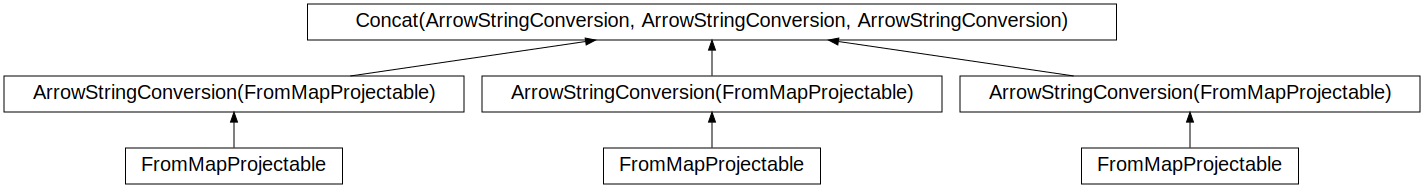

In [5]:
df_final.visualize()

A bounding box defines the rectangle that encloses a geographic area, using the minimum and maximum latitude and longitude values.

📍 New York City Bounding Box (approximate):

Minimum Latitude: 40.4774° N

Maximum Latitude: 40.9176° N

Minimum Longitude: -74.2591° W

Maximum Longitude: -73.7004° W

In [6]:
min_latitude = 40.47
max_latitude = 40.91
min_longitude = -74.25
max_longitude = -73.70

In [7]:
fare_amount = df_final["fare_amount"].compute()
trip_distance = df_final["trip_distance"].compute()

In [8]:
fare_amount.shape

(34499859,)

In [9]:
percentile_values = np.arange(0.991,1.00,0.001)
fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

In [10]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2] # choice maximum percentile value which 0.999
min_fare_amount_val = 0.50 # at new york taxi limousine commission website minimum fare is  $0.50 
print(max_fare_amount_val,min_fare_amount_val)

81.0 0.5


In [11]:
trip_distance.quantile(percentile_values) 

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [12]:
# according to NYT limousine commission min distance should be 0.25 miles so
min_trip_distance_val = 0.25
max_trip_distance_val = 24.43

### Remove Outliers from the Data

In [13]:
# select data points within the given ranges

df_final = df_final.loc[
    (df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
    (df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
    (df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
    (df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [14]:
df_final = df_final.loc[(df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) & 
(df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

In [15]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


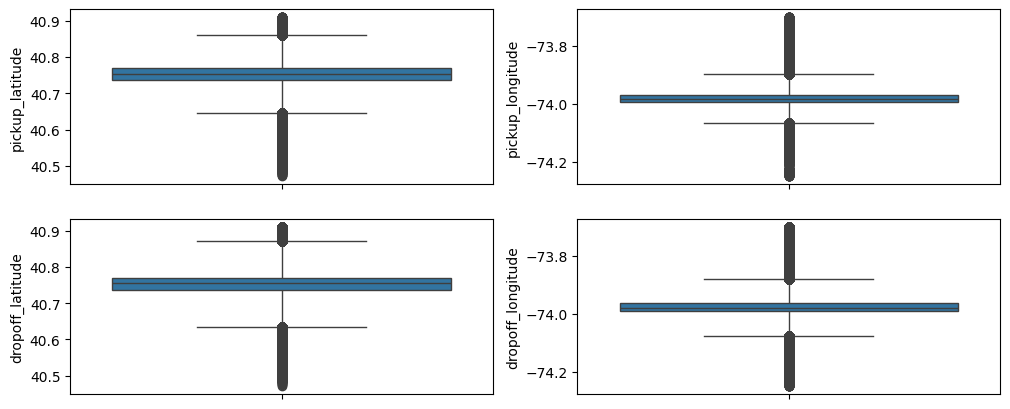

In [59]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2],whis=3)

<Axes: ylabel='trip_distance'>

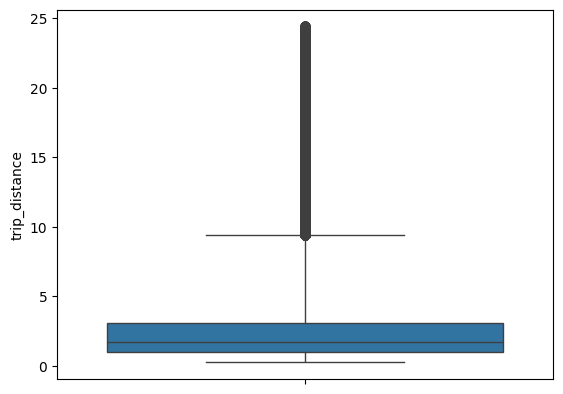

In [16]:
sns.boxplot(df_final.loc[:,"trip_distance"].compute(), whis=3)

<Axes: ylabel='fare_amount'>

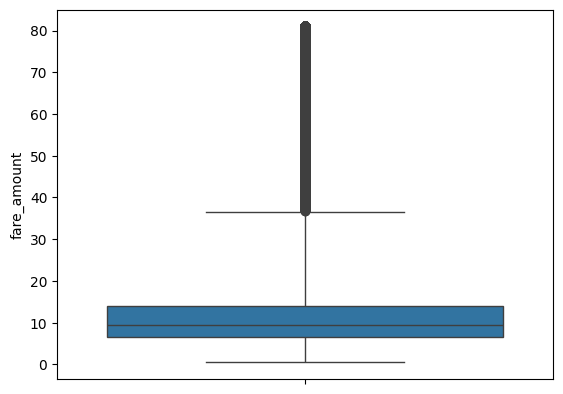

In [17]:
sns.boxplot(df_final.loc[:,"fare_amount"].compute(), whis=3)

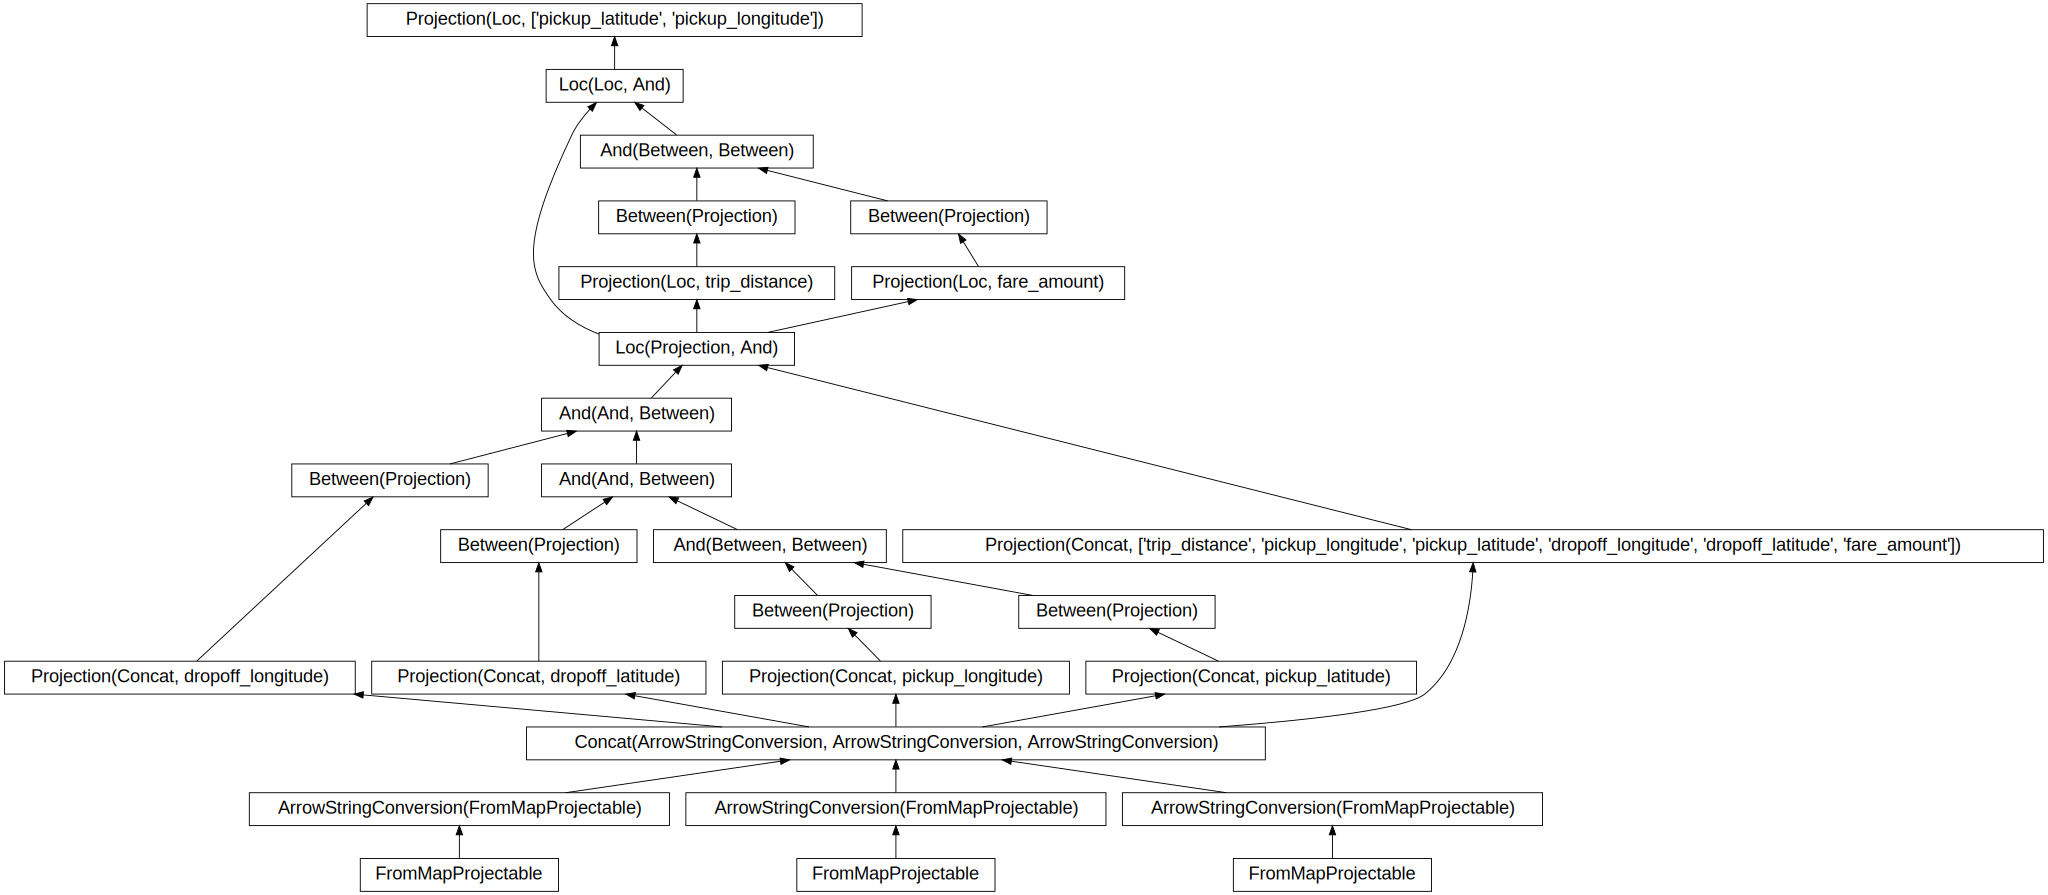

In [18]:
# save the pickup coordinates dataset

save_path = "../data/interim/location_data.csv"

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']]
pickup_coord_dataset.visualize()

In [19]:
# form the dataset

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()

print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (33506463, 2)


In [20]:
# save the dataset

pickup_coord_dataset.to_csv(save_path, index=False)

In [21]:
pickup_coord_dataset.head(10)

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625
5,40.743050,-73.980118
6,40.719990,-73.994057
7,40.744614,-73.979424
8,40.791046,-73.947151
9,40.723896,-73.998344


In [22]:
pickup_coord_dataset.min()

pickup_latitude     40.471401
pickup_longitude   -74.249069
dtype: float64

In [23]:
pickup_coord_dataset.max()

pickup_latitude     40.909744
pickup_longitude   -73.700150
dtype: float64